In [1]:
import pandas as pd
import numpy as np
from mod_genetic import run_genetic as rg
from mod_packs import quantum_potential as qp
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
price_df = pd.read_excel('PRICE INDEX.xlsx').dropna().set_index('Date')
price_val = price_df.T.values
names = [price_df.columns[i][:3] for i in range(8)]
snp_return = qp.scaled_return(price_val[0],1)
data = snp_return[4700:-300]

In [3]:
x , pot_port = qp.numpy_qpot(data , 0.0005)
d , u = qp.risk_data_input(data , 0.0005)

In [5]:
y = pot_port[:-42]
xx = x[:-42]

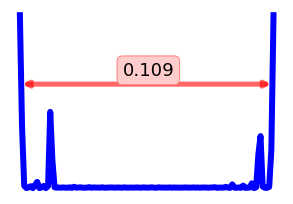

In [122]:
dataa = qp.scaled_return(price_val[6],1)
data = dataa[4700:-300]
nam = names[6]
x , pot_port = qp.numpy_qpot(data , 0.0005)
d , u = qp.risk_data_input(data , 0.0005)

xxx = price_df.iloc[-2650:].index.year
new_x = np.linspace(min(xxx), max(xxx), len(xxx))
a = 57
b= 25
y = pot_port[a:-b]
xx = x[a:-b]

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
fig, ax = plt.subplots(figsize=(5,3.5))

plt.plot(xx , np.array(y)/500 , linewidth=6 , color='blue')
# plt.xlim(d-0.001,u+0.001)
plt.annotate("", xy=(d , 0.6 ), xytext=( u , 0.6) , arrowprops=dict(arrowstyle="<->" , linewidth=5  , alpha=0.6, color='red') , label='hello')
plt.text(-0.003, 0.68, str(np.round(u-d,3)), size=18, rotation=0,
             ha="center", va="center",
             bbox=dict(boxstyle="round",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8),))

ax.set_xlabel('Return', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('Risk', fontsize=15, fontweight='black', color = '#333F4B')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.grid(True)
plt.axis(False)
plt.savefig(nam+'pot.png', dpi=300, bbox_inches='tight' , transparent=True)

In [137]:
daily_ret_value = [qp.scaled_return(price_val[i][4700:-300],1) for i in range(8)]
monthly_ret_value = [qp.scaled_return(price_val[i][4700:-300],int(len(price_df[4700:-300])/(7*12))) for i in range(8)]
seasonly_ret_value = [qp.scaled_return(price_val[i][4700:-300],int(len(price_df[4700:-300])/(7*4))) for i in range(8)]
yearly_ret_value = [qp.scaled_return(price_val[i][4700:-300],int(len(price_df[4700:-300])/7)) for i in range(8)]

In [148]:
daily_mean_ret = [np.mean(daily_ret_value[i]) for i in range(8)]
monthly_mean_ret = [np.mean(monthly_ret_value[i]) for i in range(8)]
seasonly_mean_ret = [np.mean(seasonly_ret_value[i]) for i in range(8)]
yearly_mean_ret = [np.mean(yearly_ret_value[i]) for i in range(8)]

In [158]:
time_scales = [1 , int(len(price_df[4700:-300])/(7*12)) , int(len(price_df[4700:-300])/(7*4))  , int(len(price_df[4700:-300])/(7))]
scale_risks = []
for k , ts in enumerate(time_scales):
    scale_risks.append([])
    for i in range(8):
        dataa = qp.scaled_return(price_val[i],ts)
        data = dataa[4700:-300]
        x , pot_port = qp.numpy_qpot(data , 0.0005)
        d , u = qp.risk_data_input(data , 0.0005)
        scale_risks[k].append(np.round(u-d , 4))


In [164]:
final_df = pd.DataFrame({'daily mean return':daily_mean_ret ,'daily risk':scale_risks[0], \
                         'monthly mean return': monthly_mean_ret , 'monthly risk':scale_risks[1]\
                         , 'seasonly mean return':seasonly_mean_ret , 'seasonly risk':scale_risks[2]\
                        ,'yearly mean return':yearly_mean_ret ,'yearly risk':scale_risks[3] } , index=names)

In [172]:
final_df.to_csv('final_dataFrame' , index=True)